In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



My attempt at a tov equation solver using eq 4.51 and 4.52 from JSB compact stars and also recent JSB paper

$$
\frac{dP}{dr} = -G\frac{m_r(r) \varepsilon(r)}{r^2} (1 + \frac{P(r)}{\varepsilon(r)}) (1 +\frac{4 \pi r^{3} P(r)}{m_r(r)}) (1- \frac{2 G m_r(r)}{r})^{-1}   (1)
$$

$$
\frac{dm_r(r)}{dr} = 4 \pi r^2 \varepsilon(r)
$$

To tranform into unitless form, make the following substitutions:


\begin{equation}
P = \varepsilon_0 \cdot P' \quad \varepsilon = \varepsilon_0 \cdot \varepsilon'
\end{equation}

\begin{equation}
r= a \cdot r' \quad  m_r = b \cdot m_r'
\end{equation}

From Compact Stars JSB,

\begin{equation} a = (G \cdot \varepsilon_0)^{1/2}\end{equation}  \begin{equation} b = (G^{3} \cdot \varepsilon_0)^{1/2}\end{equation}

So 

\begin{equation} r = (G \cdot \varepsilon_0)^{1/2} \cdot r'\end{equation}  \begin{equation} m_r = (G^{3} \cdot \varepsilon_0)^{1/2} \cdot m_r'\end{equation}


This transforms the equations into:

\begin{equation} 
\frac{dP'}{dr} = -\frac{m_r' \varepsilon'}{r^2} (1 + \frac{P'}{\varepsilon'}) (1 +\frac{4 \pi r'^{3} P'}{m_r'}) (1- \frac{2 m_r'}{r'})^{-1}        
\end{equation}

$$
\frac{dm_r'}{dr'} = 4 \pi r'^2 \varepsilon'    
$$


Finding the dimensionless EOS:
<br>
Pressure EOS is defined as:
$$
\begin{equation} P = c \cdot n^{2}\end{equation}  
$$

Dimensionless:
$$
\begin{equation} P'= \frac{P}{\frac{(m_^{4}}{y^2}}\end{equation}
$$

Energy density:
$$
\begin{equation} \varepsilon = m_b \cdot n + c \cdot n^{2}\end{equation}
$$

Dimensionless:
$$
\begin{equation} \varepsilon' = \frac{\varepsilon}{\frac{m_b^{2}]{y}}\end{equation}
$$

In [65]:
# defining some functions

# define EOS, did not end up using this part

def p_prime(y, nb):
    return (y**2)*(nb**2)

def ep_prime(y, nb):
    return nb + (y**2)*(nb**2)

def nb_prime(nb, mb):
    return nb/(mb**3)

#define y, nb_prime, mb, nb

#interaction strength:
y = 2

#mass of boson, leaving as 1 for now but wille eventually input different masses
m_b = 1

#number density of boson, can input different value but wil also leave as 1 for now
n_b = 1

dimless_nb = nb_prime(n_b, m_b)
dimless_p = p_prime(y, dimless_nb)
dimless_e = ep_prime(y, dimless_nb)



def TOV(t, y):
    r=t
    P,m = y
    
    if r == 0:
        return [0,0]
    
    if m == 0:
        m = 1e-10
    

    epsilon = np.sqrt(np.abs(P)) + P
    
    dPdr = -((m*epsilon)/(r**2))*(1 + (P/epsilon))*(1 + (4*(np.pi)*(r**3)*P)/m)*((1-(2*m/r))**(-1))
                                                                              
    dmdr = 4 * np.pi * (r**2) * epsilon
    
    return dPdr, dmdr                                                                          
                                                                              
                                                               

Starting to plug in values

In [71]:
#define parameters and intial conditions

#choose a radius
r= np.linspace(1e-3,0.6, 1000)
rad = [r[0], r[-1]]

#intial conditions
p_0 = 1
m_0 = 0


def event_function(t,y):
    return y[0]

event_function.terminal = True



solve = solve_ivp(TOV, rad, [p_0, m_0], events=event_function,)

radius = solve.t
pressure = solve.y[0]
mass = solve.y[1]



Now that I have a solution, I can plot it


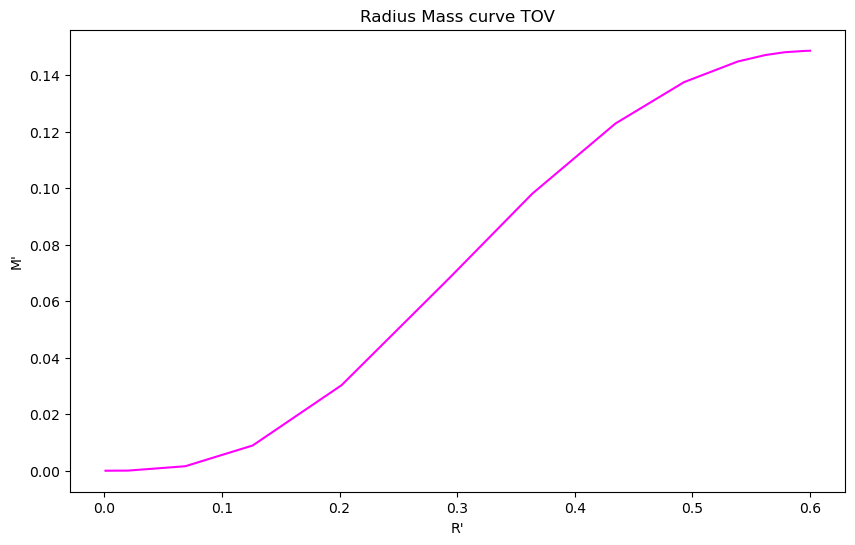

In [67]:
# radius vs mass curve

plt.figure(figsize=(10,6))
plt.plot(radius, mass, color = "magenta")
plt.xlabel("R'")
plt.ylabel("M'")
plt.title("Radius Mass curve TOV")
plt.savefig("Radius Mass curve TOV 1")

Text(0.5, 1.0, 'Radius Pressure curve TOV')

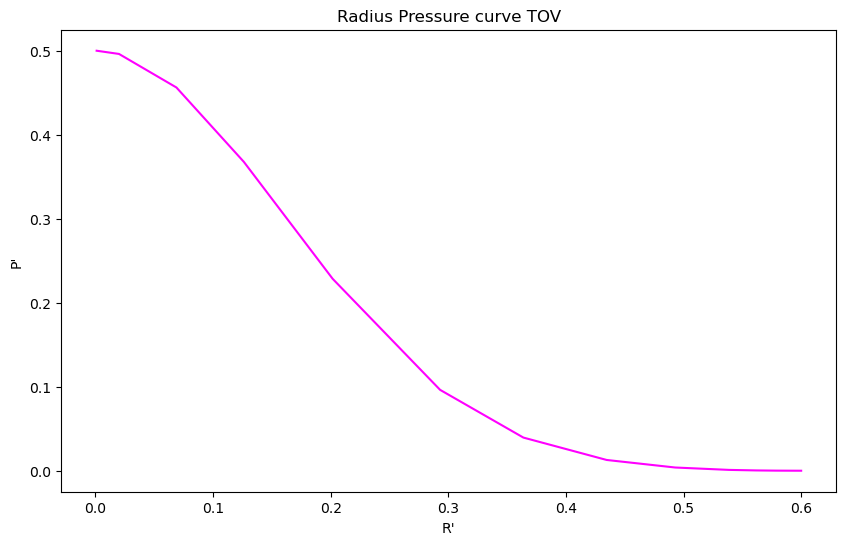

In [68]:
#radius vs pressure plot

plt.figure(figsize=(10,6))
plt.plot(radius, pressure, color = "magenta")
plt.xlabel("R'")
plt.ylabel("P'")
#plt.xscale('log')
plt.title("Radius Pressure curve TOV")

noting that from the eos, epsilon is given by:

\begin{equation} \varepsilon' = \sqrt{\frac{p'}{y^{2}}} + {p'}\end{equation}
$$

In [73]:
#can find epsilon

epsilon_solved = np.sqrt(pressure/y**2)+pressure

/var/folders/yk/6znk8k3515nd6789m74jg9h80000gn/T/ipykernel_2614/4211197824.py:3: RuntimeWarning: invalid value encountered in sqrt
  epsilon_solved = np.sqrt(pressure/y**2)+pressure


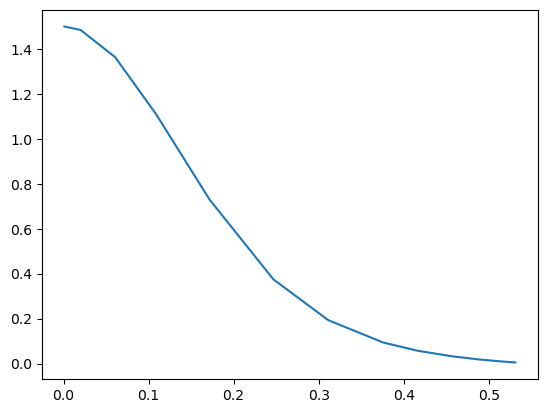

In [74]:
plt.plot(radius, epsilon_solved)

## M' and R' plots and calculations

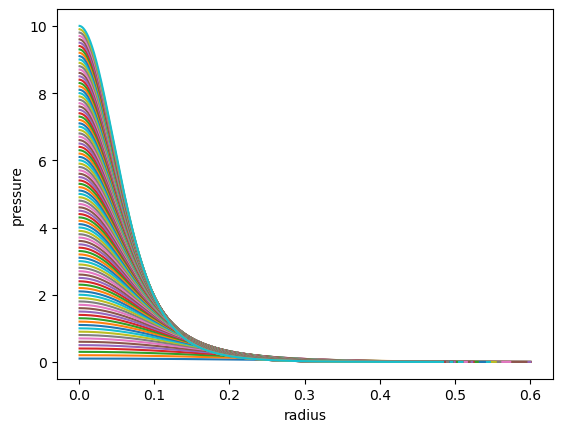

In [77]:
#define inital pressures to loop over

p_initial = np.linspace(0.1, 10, 100)

M_P_R = np.zeros((len(p_initial), 3))

for i, p in enumerate(p_initial):
    #redefine initial mass
    M0 = 0
    
    #redefine initial conditions
    initial_conditons = [p, M0]
    
    #resolve TOV
    solution = solve_ivp(TOV, rad, initial_conditons, t_eval=r, events=event_function)
        
    #extract new results
    radius_solved = solution.t
    pressure_solved = solution.y[0]
    mass_solved = solution.y[1]
    
    #plor r vs p
    plt.plot(radius_solved, pressure_solved)
    plt.xlabel('radius')
    plt.ylabel('pressure')
    plt.xscale('log')
    
    
    #final pressure, mass, radius
    
    M = mass_solved[-1]
    P = pressure_solved[-1]
    R = radius_solved[-1]
    
    M_P_R[i] = [M,P,R]
    
    

Text(0, 0.5, 'M')

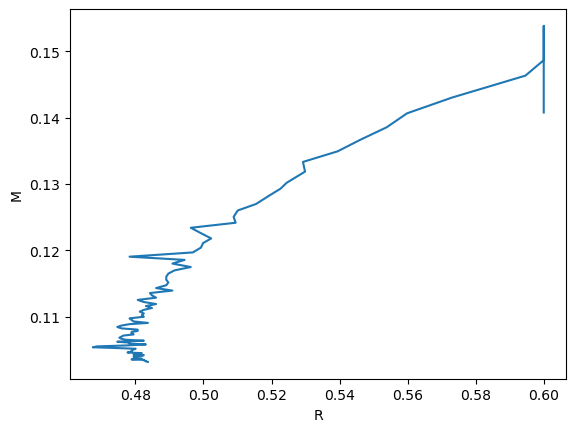

In [78]:
M = M_P_R[:, 0]
P = M_P_R[:, 1]
R = M_P_R[:, 2]


#plotting M vs R
plt.plot(R, M)
plt.xlabel("R")
plt.ylabel("M")